In [12]:
import numpy as np
import pandas as pd


data = pd.read_csv('Customers.csv')
data.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
null_values = data.isnull().sum()
non_null_values = data.notnull().sum()

print(null_values)
non_null_values

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


,0
CustomerID,200
CustomerName,200
Region,200
SignupDate,200


In [15]:
summary_stats = data.describe(include='all')
summary_stats



,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [17]:
region_distribution = data['Region'].value_counts()
region_distribution

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


<Axes: title={'center': 'Customer Distribution by Region'}, xlabel='Region'>

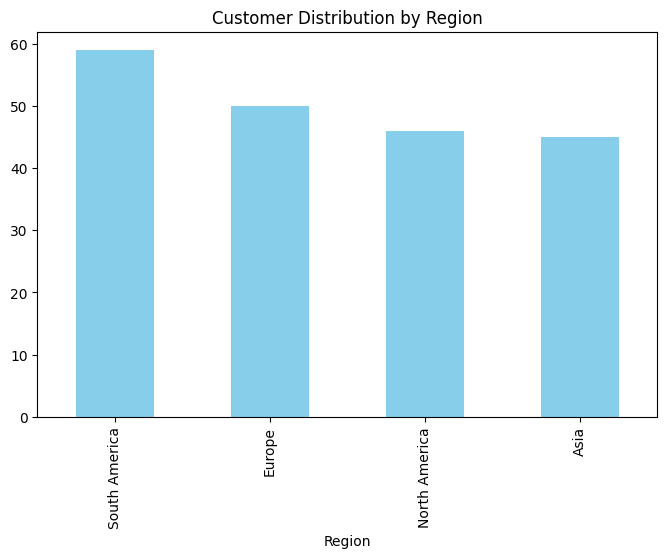

In [18]:
region_distribution.plot(kind='bar', title='Customer Distribution by Region', figsize=(8, 5), color='skyblue')

In [22]:
common_dates = data['SignupDate'].value_counts().head()
print(common_dates)

SignupDate
2024-11-11    3
2022-04-16    3
2024-02-05    2
2024-09-17    2
2022-03-14    2
Name: count, dtype: int64


In [23]:
date_range = data['SignupDate'].min(), data['SignupDate'].max()
print(f"Date range: {date_range}")

Date range: ('2022-01-22', '2024-12-28')


In [24]:
daily_signups = data['SignupDate'].value_counts()

# Calculate IQR to detect outliers
q1 = daily_signups.quantile(0.25)
q3 = daily_signups.quantile(0.75)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter outlier dates
outliers = daily_signups[(daily_signups < lower_bound) | (daily_signups > upper_bound)]
outliers

,count
SignupDate,
2024-11-11,3
2022-04-16,3
2024-02-05,2
2024-09-17,2
2022-03-14,2
2024-07-10,2
2024-09-21,2
2023-01-13,2
2023-10-17,2


In [27]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
signup_trends = data['SignupDate'].dt.year.value_counts().sort_index()
signup_trends

,count
SignupDate,
2022,64
2023,57
2024,79
